# Análise Exploratória

In [3]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

### Visão geral dos dados

In [ ]:
# Pegando o dataset
df = pd.read_csv("./dataset/superstore.csv", encoding='ISO-8859-1')

In [5]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [6]:
# Analisando as colunas
print(df.columns.values, len(df.columns))

['Row ID' 'Order ID' 'Order Date' 'Ship Date' 'Ship Mode' 'Customer ID'
 'Customer Name' 'Segment' 'Country' 'City' 'State' 'Postal Code' 'Region'
 'Product ID' 'Category' 'Sub-Category' 'Product Name' 'Sales' 'Quantity'
 'Discount' 'Profit'] 21


In [7]:
# 10 mil linhas praticamente no dataset
df.shape 

(9994, 21)

In [ ]:
# Vendo as estatísticas
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
# Sem valores nulos nas colunas
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [ ]:
# Analisando a quantidade de valores diferentes por colunas.
df.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

### Tratamento das Datas

In [9]:
# Precisamos mudar o tipo para DataFrame
print(df['Order Date'].dtype,' / ',df['Ship Date'].dtype)

object  /  object


In [10]:
# Ordem "mês,dia,ano" formatação inglesa
df['Order Date'].sample(10)

7002     8/19/2014
2162     3/13/2017
547     11/19/2017
2629    11/13/2017
7935     8/17/2017
9763     2/14/2014
2001     4/11/2017
7038     9/22/2017
1880      3/5/2015
5568     3/13/2017
Name: Order Date, dtype: object

In [11]:
# Transformando em datetime
df['Order Date'] = pd.to_datetime(df['Order Date'],format='%m/%d/%Y')
df['Ship Date']  = pd.to_datetime(df['Ship Date'],format='%m/%d/%Y')

In [15]:
# Perfeito agora
print(df['Order Date'].dtype,' / ',df['Ship Date'].dtype)

datetime64[ns]  /  datetime64[ns]


In [17]:
# Analisando inicio e final dos envios 
print(df["Order Date"].min(),"////////", df["Order Date"].max())

2014-01-03 00:00:00 //////// 2017-12-30 00:00:00


In [18]:
# Criando colunas de ano e mês
df['Year'] = df['Order Date'].dt.year
df['Month_Num'] = df['Order Date'].dt.month
df['Month'] = df['Order Date'].dt.strftime('%B')


In [19]:
# Criando coluna de trimestre
df['Quarter'] = df['Order Date'].dt.quarter

In [20]:
 # Criando uma coluna de Ano-Mês para facilitar análises de série temporal
df['Year_Month'] = df['Order Date'].dt.strftime('%Y-%m')

In [ ]:
# Não precisa rodar, já vou deixar nos arquivos

# Exportando para utilizar no desafio de Inteligência Atificial
# df.to_csv('superstore_datado.csv', index=False)

## Analisando outliers

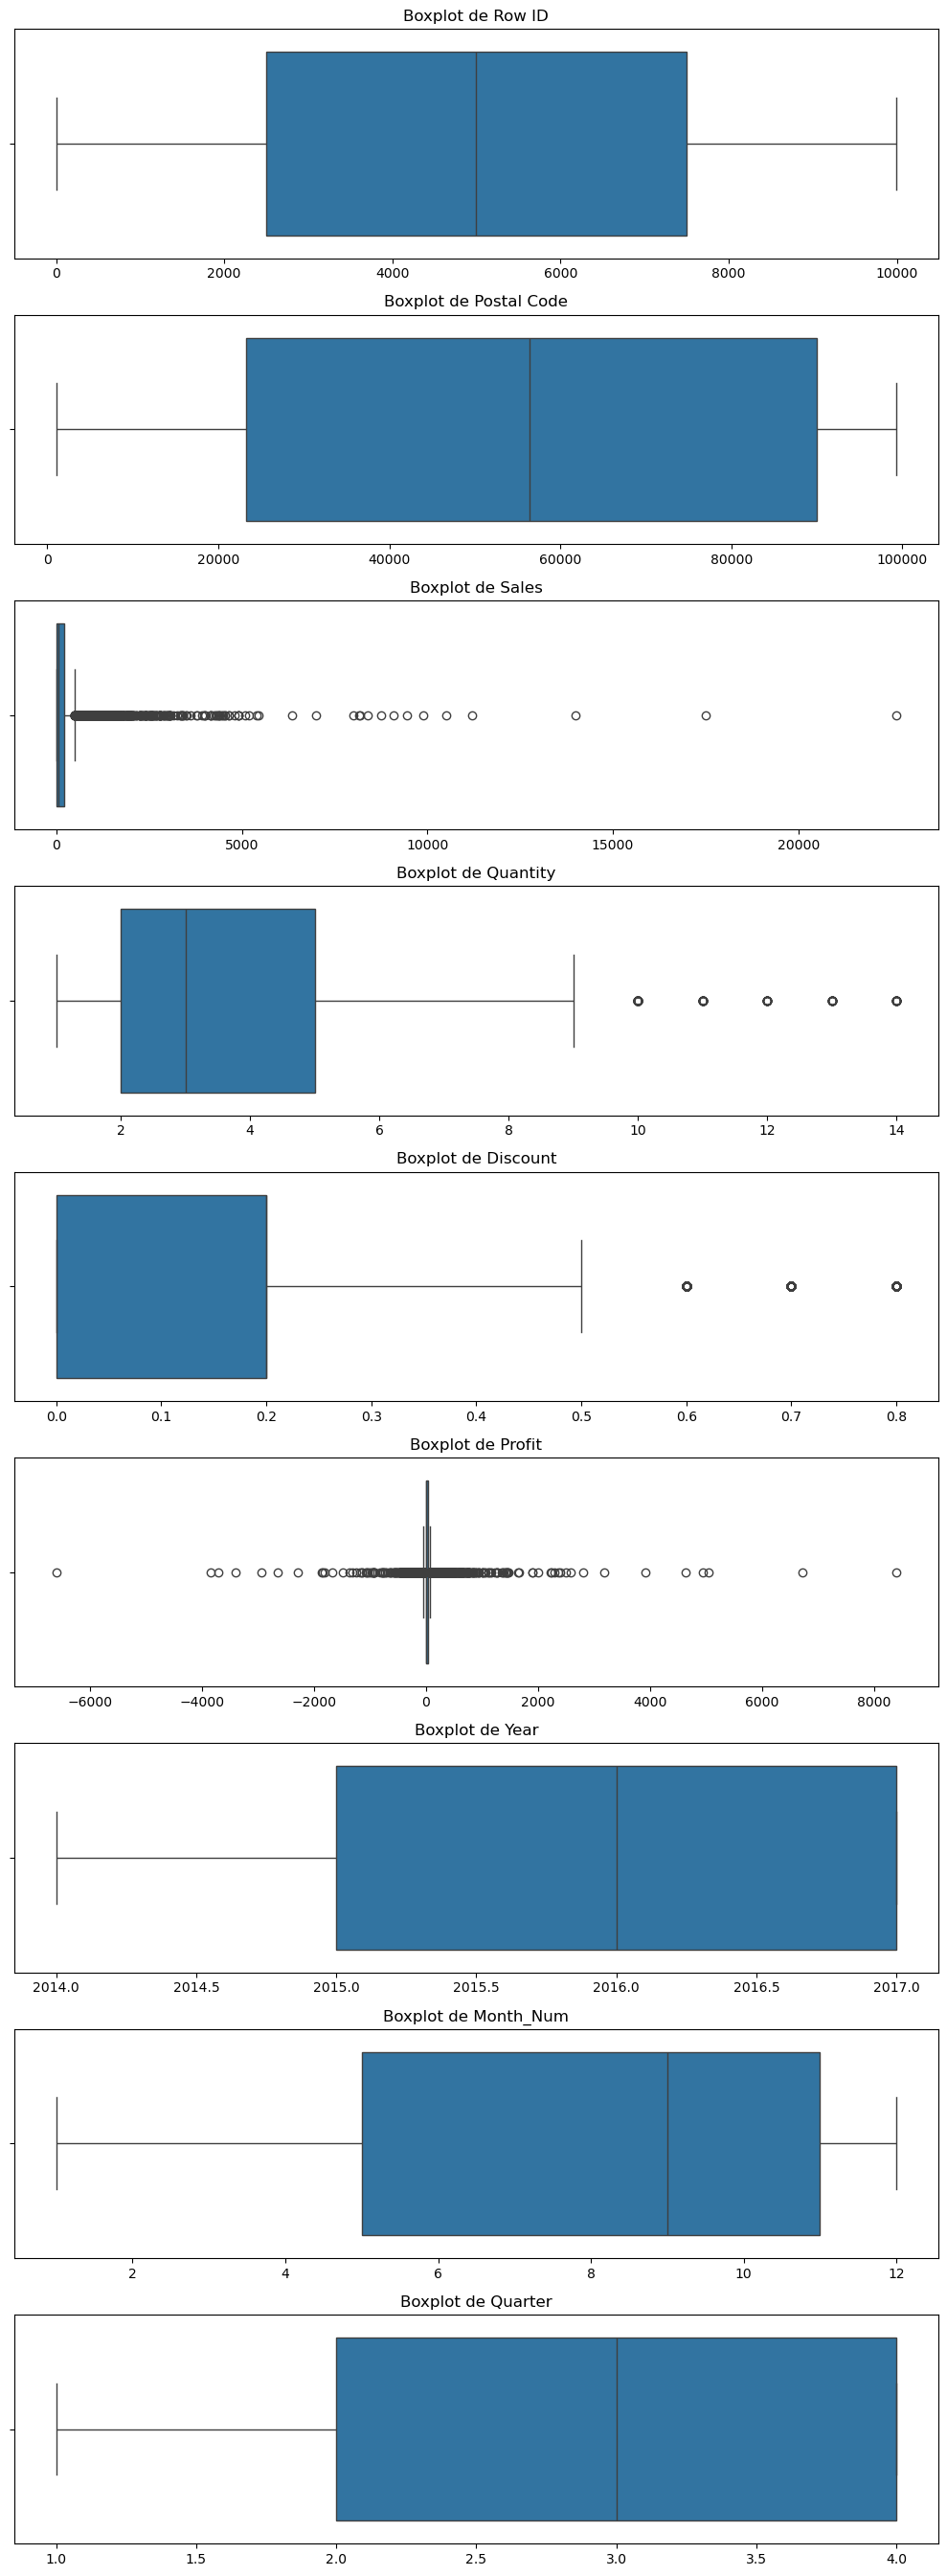

In [21]:
# Criar boxplots para todas as colunas numéricas
num_cols = df.select_dtypes(include=["number"]).columns  # Seleciona apenas colunas numéricas


plt.figure(figsize=(10, len(num_cols) * 3))  

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i) 
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.xlabel("")  

plt.tight_layout()
plt.show()


**Análise** 

- Percebemos que na coluna "sales" temos bastantes outliers. Além de uma venda de valor muito alto.  

- Temos pedidos que tem bastante quantidade na coluna "quantity", provavelmente produtos pequenos e baratos.

- Temos também lucros/prejuizos bem divergentes na coluna "proft". 

# Insights Da Empresa

- Primeiro o gráfico e embaixo a análise.

### Vendas Totais Por Ano Com % Do Lucro Total

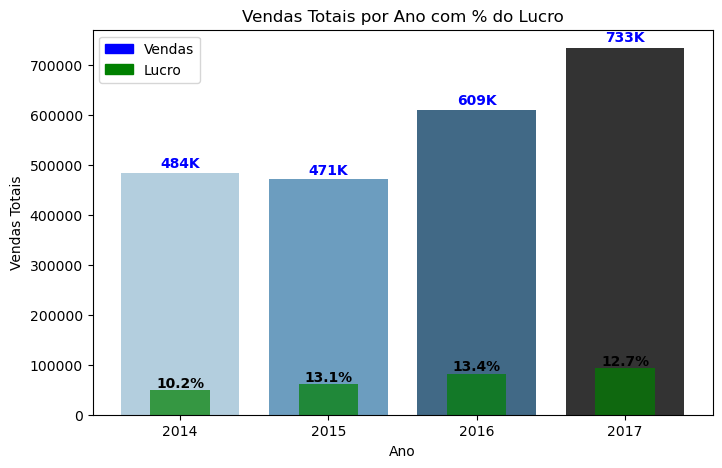

In [22]:
# Agrupa as vendas e lucros por ano
sales_by_year = df.groupby('Year')['Sales'].sum().reset_index()
profit_by_year = df.groupby('Year')['Profit'].sum().reset_index()

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=sales_by_year, x='Year', y='Sales', palette='Blues_d', hue='Year')
ax.legend([], [], frameon=False)  # Remove a legenda padrão

plt.title('Vendas Totais por Ano com % do Lucro')
plt.xlabel('Ano')
plt.ylabel('Vendas Totais')

# Obtem as posições das barras no eixo x
x_positions = ax.get_xticks()
# Define uma largura menor para as barras de lucro
width = 0.4

# Sobrepõe as barras de lucro (em verde) e adiciona a porcentagem no topo da barra de lucro
for i, (profit, sales) in enumerate(zip(profit_by_year['Profit'], sales_by_year['Sales'])):
    plt.bar(x=x_positions[i], height=profit, width=width, color='green', alpha=0.7)
    # Calcula a porcentagem do lucro em relação às vendas
    profit_percentage = (profit / sales) * 100 if sales != 0 else 0
    plt.text(x_positions[i], profit, f'{profit_percentage:.1f}%', ha='center', va='bottom', 
             color='black', fontweight='bold')

# Adiciona o número dos valores de venda em cima da barra de venda, formatado com "K"
for i, sales in enumerate(sales_by_year['Sales']):
    formatted_sales = f"{sales/1000:.0f}K" if sales >= 1000 else str(sales)
    # Posiciona o texto um pouco acima da barra de venda
    plt.text(x_positions[i], sales + sales*0.01, formatted_sales, ha='center', va='bottom',
             color='blue', fontweight='bold')

# Legenda customizada
legend_elements = [
    Patch(facecolor='blue', edgecolor='blue', label='Vendas'),
    Patch(facecolor='green', edgecolor='green', label='Lucro')
]
plt.legend(handles=legend_elements)

plt.show()


**Análise**  

Podemos analisar que o começa da empresa em 2014, 2015 tivemos menos vendas afinal são anos de aprendizado para empresa, por isso ficaram praticamente no mesmo lugar que o ano inicial.  

Em 2016 e 2017 começaram a aumentar a quantidade de vendas talvez por mudanças na estratégia de venda dos produtos ou troca de estoque por produtos novos, aumentar o marketing, começaram a vender no digital, existem várias possibilidades, isso nos dá um lucro maior anual apesar da porcentagem dos lucros continuar quase a mesma dos últimos 3 anos isso é normal, pois os produtos não mudam de preço com uma variação muito grande, mas como tivemos mais vendas isso gera mais capital a empresa.  

Provavelmente em 2018 a empresa crescerá ainda mais.

## ------------------------------------------------------------------------------------------------------------

### Diferença de Vendas por Mês (2016 - 2017)

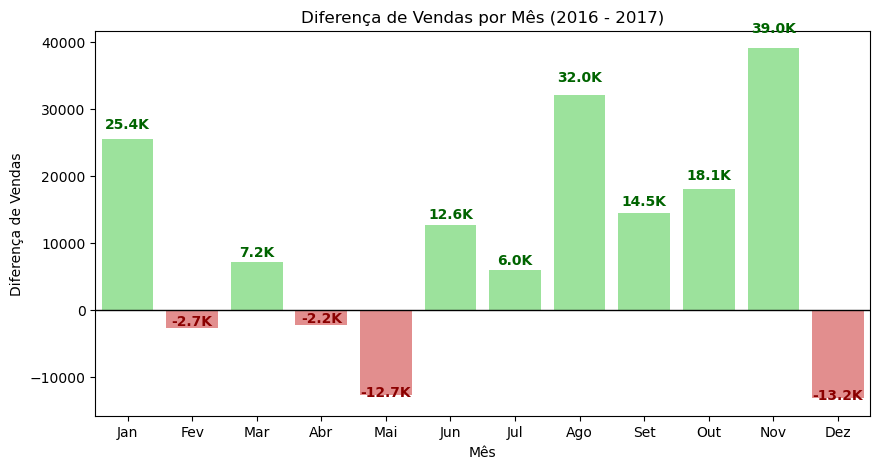

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar vendas por mês e ano
sales_by_month = df.groupby(['Year', 'Month_Num'])['Sales'].sum().unstack(level=0).fillna(0)

# Calcula a diferença entre 2017 e 2016
sales_by_month['Difference'] = sales_by_month[2017] - sales_by_month[2016]

# Criando lista de cores corrigida
colors = ['lightgreen' if diff >= 0 else 'lightcoral' for diff in sales_by_month['Difference']]

plt.figure(figsize=(10, 5))

# Criando o gráfico com hue correto e sem legenda
ax = sns.barplot(x=sales_by_month.index, y=sales_by_month['Difference'], hue=sales_by_month.index, 
                 palette=colors, legend=False)

# Função para formatar valores com "K"
def format_value(value):
    if abs(value) >= 1000:
        return f"{value/1000:.1f}K" if value % 1000 != 0 else f"{int(value/1000)}K"
    return f"{int(value)}"

# Adicionando os valores acima das barras
for i, diff in enumerate(sales_by_month['Difference']):
    color = 'darkgreen' if diff >= 0 else 'darkred'  # Cor do texto
    formatted_text = format_value(diff)  # Formatação para 'K'
    plt.text(i, diff + (diff * 0.05), formatted_text, ha='center', va='bottom', 
             color=color, fontweight='bold', fontsize=10)

# Configurações do gráfico
plt.axhline(0, color='black', linewidth=1)  # Linha no zero para referência
plt.title('Diferença de Vendas por Mês (2016 - 2017)')
plt.xlabel('Mês')
plt.ylabel('Diferença de Vendas')
plt.xticks(ticks=range(12), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 
                                    'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.show()


**Análise**

Podemos perceber que a empresa esta evoluindo bastante financeiramente.  

Tivemos 4 meses com menos lucros que no ano passado, mas nos outros 8 meses tivemos uma enorme evolução.   

Em geral, foi um bom ano, temos que analisar o que aconteceu em maio e dezembro, como dezembro é natal o pessoal gasta bastante era para estar em um lucro maior que na teoria.

## ------------------------------------------------------------------------------------------------------------

### Vendas por Região 2016 - 2017

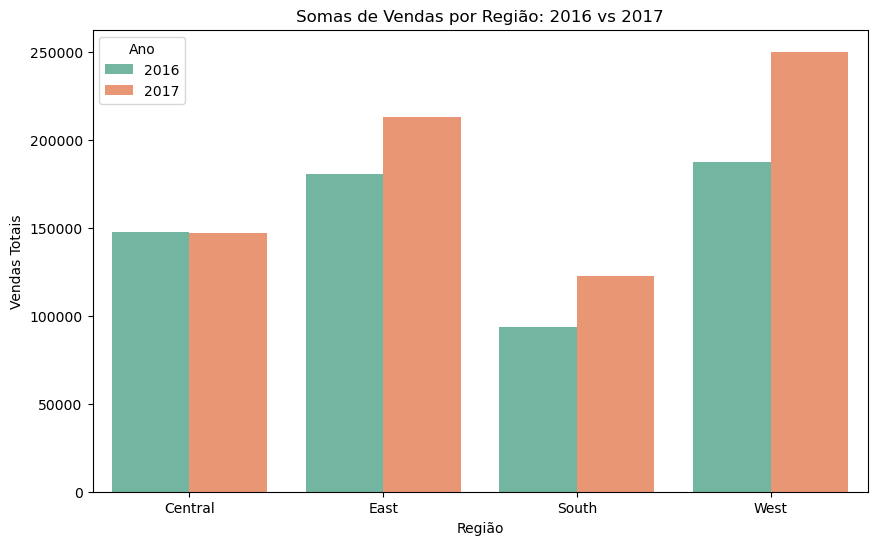

In [24]:
# 6. Somas de Vendas por Região de 2016 e 2017
# =============================================================================
df_reg = df[df['Year'].isin([2016, 2017])]
sales_region = df_reg.groupby(['Region', 'Year'])['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
# Neste gráfico, já usamos hue, portanto não há aviso
sns.barplot(data=sales_region, x='Region', y='Sales', hue='Year', palette='Set2')
plt.title('Somas de Vendas por Região: 2016 vs 2017')
plt.xlabel('Região')
plt.ylabel('Vendas Totais')
plt.legend(title='Ano')
plt.show()

**Análise**  

Podemos perceber que nossa maior quantidade de vendas são concentradas no "leste" e "oeste", nossas regiões mais fracas são a "central" e "sul".   

Não tivemos nenhuma diferença de vendas do ano passado na região "central", mas apesar disto nas outras regiões tivemos um bom crescimento.  

Disparado tivemos um belo crescimento na região "oeste" precisamos analisar e ver o porquê disto, talvez tivemos mais marketing? Abrimos novas lojas? ...

## ------------------------------------------------------------------------------------------------------------

### Análise dos Produtos em 2017

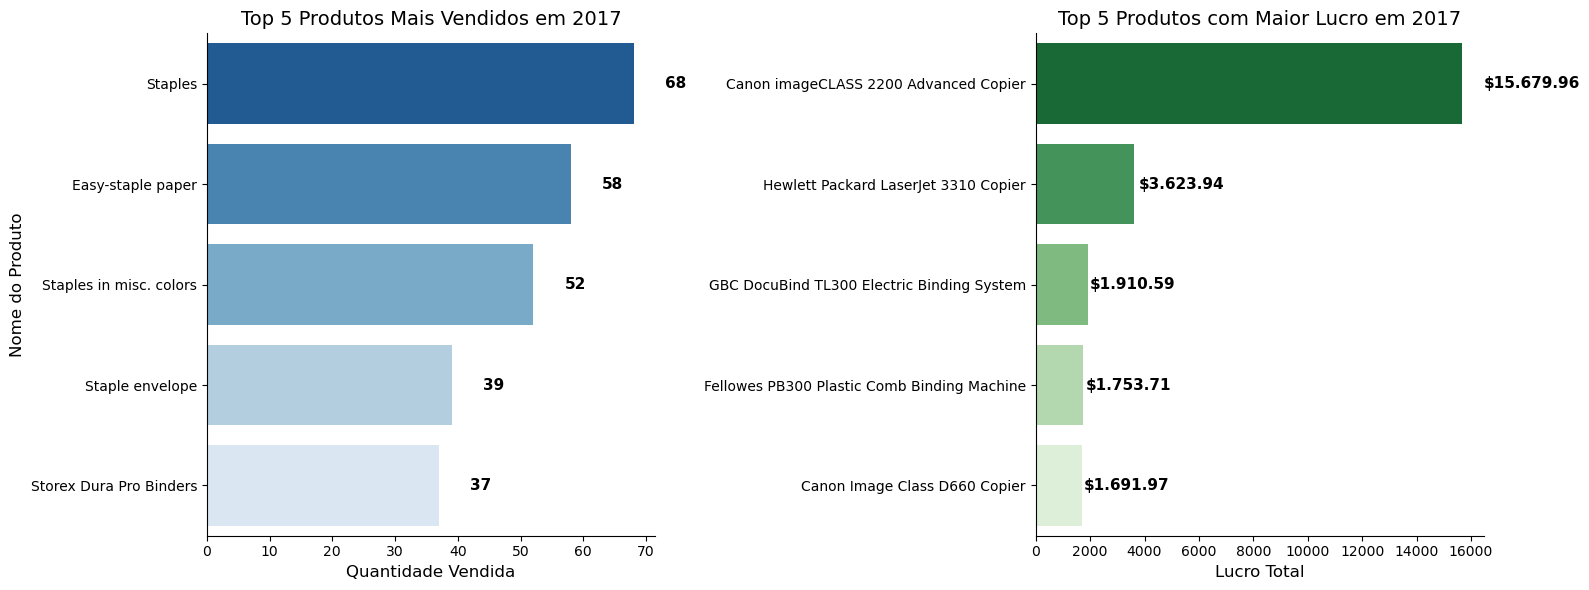

In [25]:
# Filtrar os dados para o ano de 2017
df_2017 = df[df['Year'] == 2017]

#  Top 5 produtos mais vendidos (por quantidade)
top_sold_products = df_2017.groupby('Product Name')['Quantity'].sum().nlargest(5).reset_index()

#  Top 5 produtos mais lucrativos
top_profit_products = df_2017.groupby('Product Name')['Profit'].sum().nlargest(5).reset_index()

# Criando a figura para os dois gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Aumentamos a largura

# Gráfico dos produtos mais vendidos
sns.barplot(data=top_sold_products, x="Quantity", y="Product Name", hue="Product Name", ax=axes[0], palette="Blues_r", legend=False)
axes[0].set_title("Top 5 Produtos Mais Vendidos em 2017", fontsize=14)
axes[0].set_xlabel("Quantidade Vendida", fontsize=12)
axes[0].set_ylabel("Nome do Produto", fontsize=12)

# Removendo bordas laterais
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)

# Adicionando valores acima das barras
for i, v in enumerate(top_sold_products["Quantity"]):
    axes[0].text(v + 5, i, f"{v:,}".replace(",", "."), va='center', fontsize=11, fontweight='bold')

# Gráfico dos produtos mais lucrativos
sns.barplot(data=top_profit_products, x="Profit", y="Product Name", hue="Product Name", ax=axes[1], palette="Greens_r", legend=False)
axes[1].set_title("Top 5 Produtos com Maior Lucro em 2017", fontsize=14)
axes[1].set_xlabel("Lucro Total", fontsize=12)
axes[1].set_ylabel("")

# Removendo bordas laterais
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)

# Adicionando valores acima das barras
for i, v in enumerate(top_profit_products["Profit"]):
    axes[1].text(v + abs(v) * 0.05, i, f"${v:,.2f}".replace(",", "."), va='center', fontsize=11, fontweight='bold')

# Ajuste no layout
plt.tight_layout()
plt.show()


**Análise**  

Podemos perceber que nem sempre os produtos mais vendidos são os mais lucrativos.    

Vendas de produtos caros em pequenas quantidades geraram mais lucro do que vários produtos de pequeno valor para nossa empresa.  

Tivemos mais vendas no setor de materiais de escritórios, mas não foram os que deram mais lucros e sim produtos mais caros do setor de tecnologia.